# Task # 2 - To Explore Supervised Machine Learning

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Problem Statement
### What will be predicted score if a student study for 9.25 hrs in a day?

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Loading the Data

In [2]:
data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


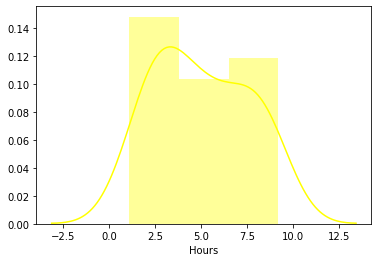

In [3]:
sns.distplot(data["Hours"],color="yellow")

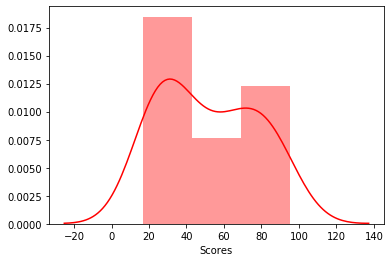

In [4]:
sns.distplot(data["Scores"],color="red")

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### Assigning values to x as hours and y as scores

In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
#checking the shape of x and y
print(x.shape,y.shape)

(25, 1) (25,)


#### Scatter Plot of Hours Studies VS. Scores Obtained

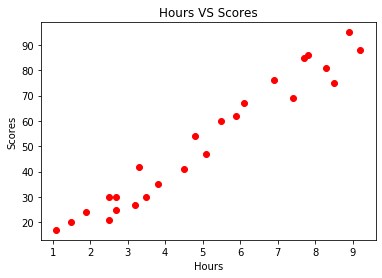

In [9]:
plt.scatter(x,y,c="red",marker="o")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours VS Scores")
plt.show()

#### Spliting the Data into Training And Testing Data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [11]:
#checking the shapes of training and testing data
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(20, 1) (20,) (5, 1) (5,)


#### Application of Linear Regression Algorithm

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [13]:
#Calculating m(slope)
m=lr.coef_
m

array([9.91065648])

In [14]:
#Calculating c(intercept)
c=lr.intercept_
c

2.018160041434662

#### Visualizing the Actual And Predicted Data

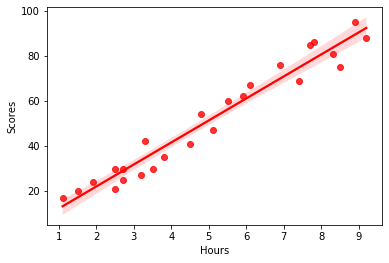

In [15]:
sns.regplot(x,y,color="red")
plt.show()

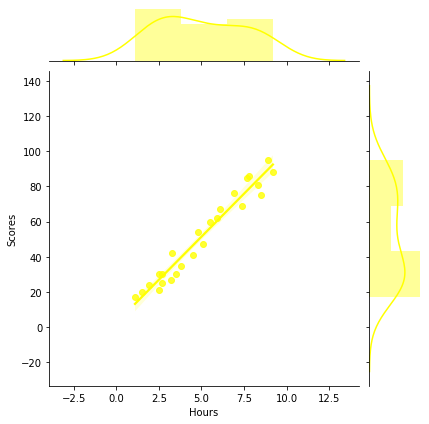

In [16]:
sns.jointplot(x="Hours",y="Scores",data=data,color="yellow",kind="reg")
plt.show()

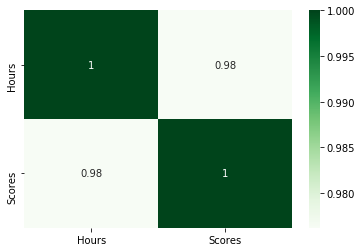

In [17]:
sns.heatmap(data.corr(),cmap="Greens" ,annot=True)
plt.show()

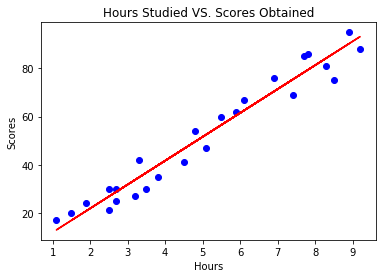

In [18]:
plt.scatter(x,y,c="blue")
plt.plot(x,m*x+c,color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Studied VS. Scores Obtained")
plt.show()

#### Comparing the Actual And Predicted Y values

In [19]:
final=pd.DataFrame(
{
    "Actual Scores":y_test,
    "Predicted Scores":y_pred
})

In [30]:
final.reset_index(drop=True,inplace=True)

In [21]:
final

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


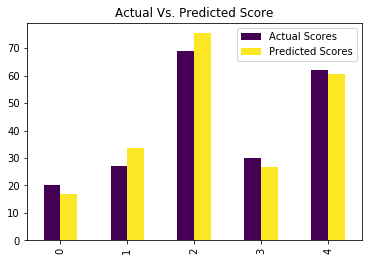

In [22]:
final.plot(kind="bar",cmap="viridis")
plt.title("Actual Vs. Predicted Score")
plt.show()

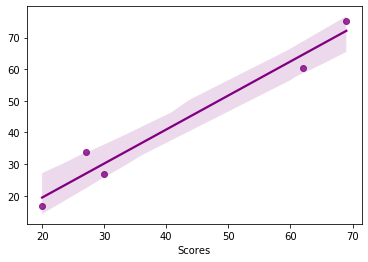

In [23]:
sns.regplot(y_test,y_pred,color="purple")

#### Predicting the Score of a Student if He/She studies for 9.25 hours 

In [29]:
hours=9.25
marks=lr.predict([[9.25]])
print("The Scores Of Student on studying for {} hours is {}" .format(hours,marks[0].round(2)))

The Scores Of Student on studying for 9.25 hours is 93.69


## Conclusion
- The Scores Of Student on studying for 9.25 hours is [93.69]

#### Computing Error And Accuracy

In [25]:
#computing error and score
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
R2 Score: 0.9454906892105354


#### Training And Testing Score

In [26]:
#training score
lr.score(x_train,y_train)

0.9515510725211553

In [27]:
#testing score
lr.score(x_test,y_test)

0.9454906892105354